In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import read_csv, DataFrame, Series, qcut
from pandas.tools.plotting import radviz,scatter_matrix,bootstrap_plot,parallel_coordinates
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
%matplotlib inline


x = read_csv("training.csv", parse_dates=['Date'], index_col='Date')
dataset1 = read_csv('testing.csv', parse_dates=['Date'],
                    index_col='Date')
otg1 = dataset1.Value

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

# Проверка на стационарность

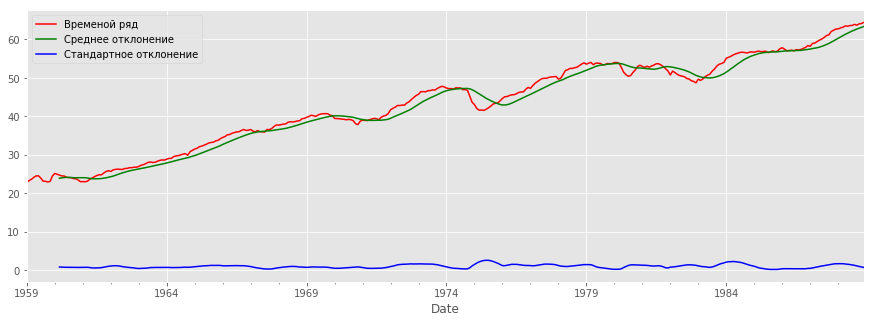

In [66]:
x["Value"].plot(color='r', legend=True, label='Временой ряд')
x["Value"].rolling(window=15).mean().plot(color='g', legend=True,
                                          label='Среднее отклонение')
x["Value"].rolling(window=15).std().plot(color='b', legend=True,
                                         label='Стандартное отклонение')
plt.show()

Вывод: У ряда есть тренд => ряд не стационарен

In [67]:
# Тест Дики-Фуллера

test = sm.tsa.adfuller(x["Value"])
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']:
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')


adf:  -0.253391179928
p-value:  0.931851042299
Critical values:  {'1%': -3.4489583388155194, '5%': -2.869739378430086, '10%': -2.5711381780459002}
есть единичные корни, ряд не стационарен


# Разложение временного ряда на тренд, сезональность, остаток, их визуализация и оценка стационарности

## Аддитивная модель

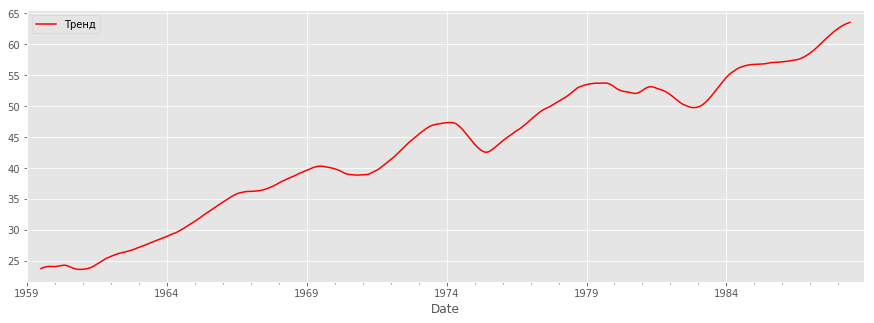

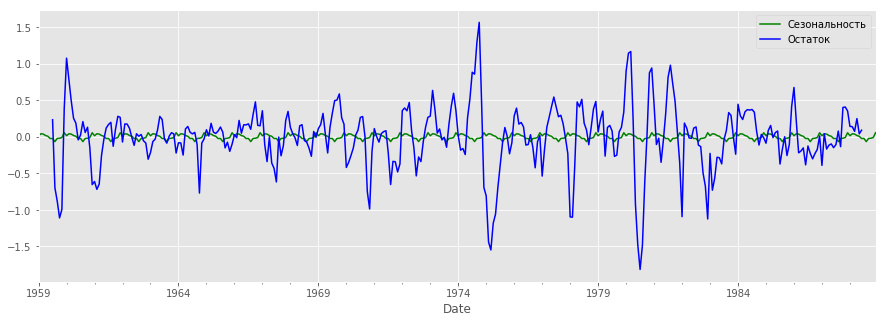

In [56]:
decompos = seasonal_decompose(x["Value"], model="additive")
decompos.trend.plot(color='r', label='Тренд', legend=True)
plt.show()
decompos.seasonal.plot(color='g', label='Сезональность', legend=True)
decompos.resid.plot(color='b', label='Остаток', legend=True)
plt.show()

## Проверка тренда на стационарность

In [54]:
decompos.trend.dropna()
test = sm.tsa.adfuller(decompos.trend)
print('adf: ', test[0])
print ('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']:
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')

adf:  -0.861576033358
p-value:  0.800362576153
Critical values:  {'1%': -3.4503224123605194, '5%': -2.8703384787266608, '10%': -2.5714576124885218}
есть единичные корни, ряд не стационарен


## Проверка сезональность на стационарность

In [55]:
decompos.seasonal.dropna()
test = sm.tsa.adfuller(decompos.seasonal)
print('adf: ', test[0])
print ('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']:
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')

adf:  -2.50886761099e+14
p-value:  0.0
Critical values:  {'1%': -3.4492815848836296, '5%': -2.8698813715275406, '10%': -2.5712138845950587}
единичных корней нет, ряд стационарен


## Проверка остатка на стационарность

In [62]:
decompos.resid.dropna(inplace=True)
test = sm.tsa.adfuller(decompos.resid)
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']:
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')

adf:  -7.46608373979
p-value:  5.20019389833e-11
Critical values:  {'1%': -3.4496162602188187, '5%': -2.870028369720798, '10%': -2.5712922615505627}
единичных корней нет, ряд стационарен


## Мультипликативная модель

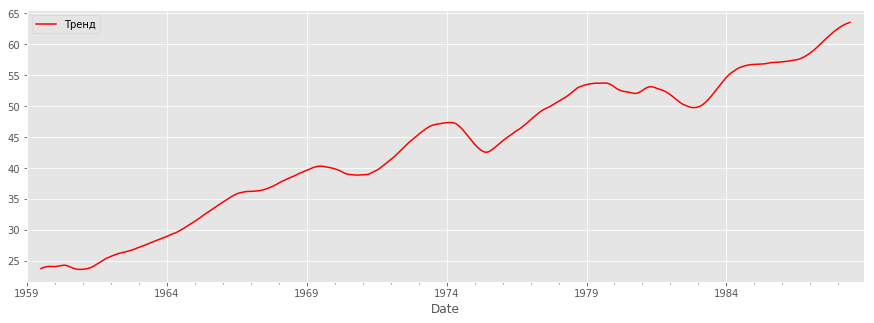

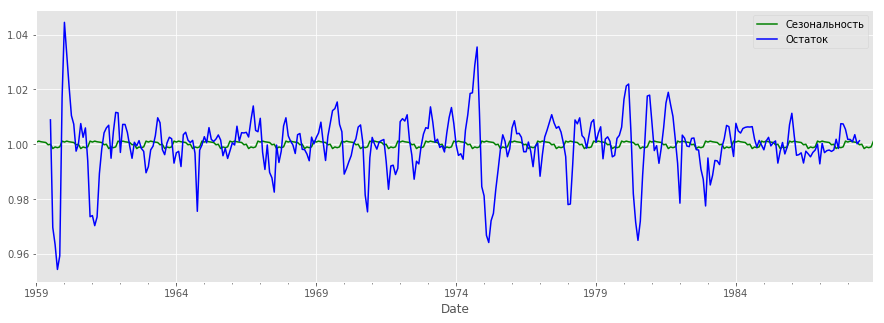

In [58]:
decompos = seasonal_decompose(x["Value"], model="multiplicate")
decompos.trend.plot(color='r', label='Тренд', legend=True)
plt.show()
decompos.seasonal.plot(color='g', label='Сезональность', legend=True)
decompos.resid.plot(color='b', label='Остаток', legend=True)
plt.show()

## Проверка тренда на стационарность

In [60]:
decompos.trend.dropna(inplace=True)
test = sm.tsa.adfuller(decompos.trend)
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']:
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')

adf:  -0.861576033358
p-value:  0.800362576153
Critical values:  {'1%': -3.4503224123605194, '5%': -2.8703384787266608, '10%': -2.5714576124885218}
есть единичные корни, ряд не стационарен


## Проверка сезональности на стационарность

In [61]:
decompos.seasonal.dropna()
test = sm.tsa.adfuller(decompos.seasonal)
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']:
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')

adf:  -1.14122257902e+14
p-value:  0.0
Critical values:  {'1%': -3.4495033946549123, '5%': -2.8699787979596136, '10%': -2.5712658305164955}
единичных корней нет, ряд стационарен


## Проверка остатка на стационарность 

In [63]:
decompos.resid.dropna(inplace=True)
test = sm.tsa.adfuller(decompos.resid)
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']:
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')

adf:  -7.46608373979
p-value:  5.20019389833e-11
Critical values:  {'1%': -3.4496162602188187, '5%': -2.870028369720798, '10%': -2.5712922615505627}
единичных корней нет, ряд стационарен


На примере данного ряда видим:
    Для аддитивной модели
        Тренд не обладает стационарностью
        Cезональность обладают стационарностью
        Остаток обладает стационарностью
    Для мультипликативной модели
        Тренд не обладает стационарностью
        Cезональность обладают стационарностью
        Остаток обладает стационарностью


# Поиск порядка интегрируемости

In [95]:
otg = x.Value

i = 1
dftest = sm.tsa.adfuller(otg)
if dftest[0] > dftest[4]['5%']:
    otg1diff = otg.diff(periods=1).dropna()
else:
    i = 0
k = 0
while i == 1:
    dftest = sm.tsa.adfuller(otg1diff, autolag='AIC')
    if dftest[0] <= dftest[4]['5%']:
        i = 0
    otg1diff = otg1diff.diff(periods=1).dropna()
    k = k + 1

if k:
    print("Ряд является интегрированным порядка ", k)

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(2, 1, 1)
fig = sm.graphics.tsa.plot_acf(otg1diff, lags=25, ax=ax1)
ax2 = fig.add_subplot(2, 1, 1)
fig = sm.graphics.tsa.plot_pacf(otg1diff, lags=25, ax=ax2)


Ряд является интегрированным порядка  1


/home/maijor/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


## ARIMA


                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                  359
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -120.367
Method:                       css-mle   S.D. of innovations              0.338
Date:                Thu, 14 Dec 2017   AIC                            248.734
Time:                        21:03:22   BIC                            264.267
Sample:                    02-01-1959   HQIC                           254.911
                         - 12-01-1988                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1176      0.036      3.271      0.001       0.047       0.188
ar.L1.D.Value     0.6531      0.091      7.185      0.000       0.475       0.831
ma.L1.D.Value    -0.2984      0.115     

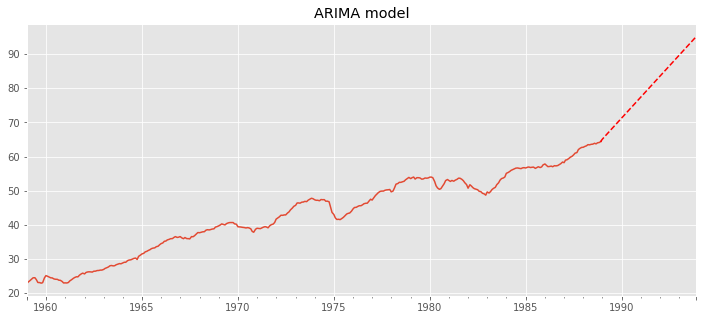

R2:  -289.164494663
AIC= 248.7336572447498


In [94]:
model_ARIMA = sm.tsa.ARIMA(otg, order=(1, 1, 1), freq='W').fit()
print(model_ARIMA.summary())

result = model_ARIMA.predict('1988-12-01', '1993-12-01', typ='levels')
r2 = r2_score(otg1, result['1992-10-10':])
print('R2 = ', r2)

otg.plot(figsize=(12, 5))
result.plot(figsize=(12, 5), style='r--')
plt.title("ARIMA model")
plt.show()
print("R2: ", r2)
print("AIC=", model_ARIMA.aic)

                           Statespace Model Results                           
Dep. Variable:                  Value   No. Observations:                  360
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -120.678
Date:                Thu, 14 Dec 2017   AIC                            251.356
Time:                        21:19:29   BIC                            270.787
Sample:                    01-01-1959   HQIC                           259.082
                         - 12-01-1988                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0475      0.031      1.520      0.129      -0.014       0.109
drift      -1.375e-05      0.000     -0.100      0.921      -0.000       0.000
ar.L1          0.6167      0.081      7.574      0.0

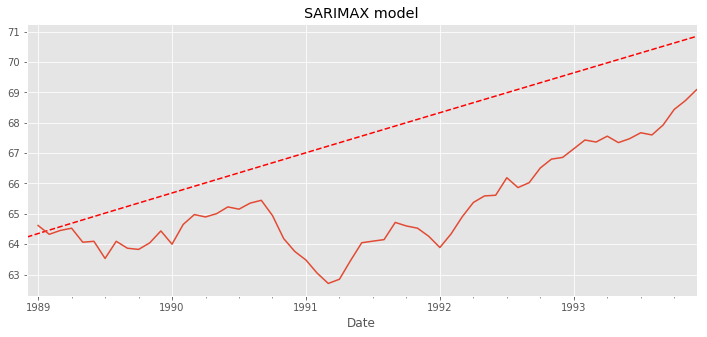

R2 = -1.90719191816
AIC= 251.356381346


In [107]:
model_SARIMAX = sm.tsa.statespace.SARIMAX(otg, order=(1, 1, 1), 
                                          trend='ct').fit()
result = model_SARIMAX.predict(start='1988-12-01', end='1993-12-01', 
                               dynamic=True, simple_differencing=True)
print(model_SARIMAX.summary())
r2 = r2_score(otg1, result['1989-01-01':])
result.plot(figsize=(12, 5), style='r--')
otg1.plot(figsize=(12, 5))
plt.title("SARIMAX model")
plt.show()
print("R2 =", r2)
print("AIC=", model_SARIMAX.aic)